In [2]:
import os
os.environ["OMP_NUM_THREADS"] = "1" # Faz o sistema o operacional usar uma thread no programa, Kmeans utliza muitas threads segurança

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
data = pd.read_csv('Mall_Customers.csv')

In [6]:
X_Age_Score = data.iloc[:, [2,4]].values

In [7]:
sc = StandardScaler()
X_Age_Score = sc.fit_transform(X_Age_Score)

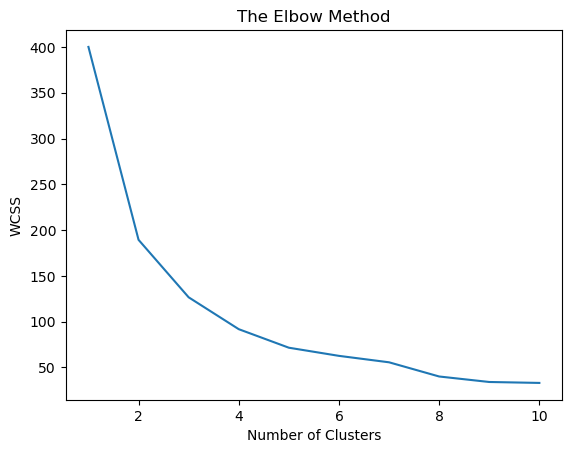

In [8]:
# Inicializa uma lista vazia para armazenar os valores de WCSS para cada número de clusters
wcss = []

# Loop para testar diferentes números de clusters, variando de 1 a 10
for i in range(1, 11):
    # Cria uma instância do KMeans com 'i' clusters e a inicialização 'k-means++' para otimizar a escolha dos centróides
    # A opção random_state=42 é usada para garantir a reprodutibilidade dos resultados
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    
    # Ajusta o modelo aos dados para o número atual de clusters 'i'
    kmeans.fit(X_Age_Score)
    
    # Calcula a inércia (WCSS - Within-Cluster Sum of Squares), que mede a soma das distâncias dos pontos aos seus centróides
    # Quanto menor o WCSS, melhor a coesão do cluster
    wcss.append(kmeans.inertia_)  # Adiciona o WCSS da configuração atual à lista

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
# Inicializa o modelo KMeans para segmentar os dados em 6 clusters
# 'n_clusters=6' define que queremos dividir os dados em 6 grupos
# 'init="k-means++"' melhora a escolha inicial dos centróides, facilitando uma boa convergência
# 'random_state=42' é definido para garantir resultados reprodutíveis
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)

# Ajusta o modelo aos dados e prevê a qual cluster cada ponto pertence
# 'fit_predict' treina o modelo com os dados 'X_Age_Score' e atribui um rótulo de cluster para cada ponto
# O resultado 'y_kmeans' contém o índice do cluster para cada ponto (valores entre 0 e 5)
y_kmeans = kmeans.fit_predict(X_Age_Score)

In [10]:
y_kmeans

array([2, 1, 4, 1, 2, 1, 3, 1, 5, 1, 5, 1, 5, 1, 3, 1, 3, 2, 5, 1, 3, 1,
       5, 1, 5, 1, 3, 2, 3, 1, 5, 1, 5, 1, 5, 1, 3, 1, 3, 1, 0, 1, 0, 2,
       3, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 3, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 3, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 3, 2, 2, 2, 0, 0, 0, 0, 2, 3, 2, 1, 4, 1, 3, 1, 5, 1, 5, 1,
       2, 1, 4, 1, 3, 1, 4, 1, 5, 1, 2, 1, 4, 1, 0, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 0, 1, 4, 1, 5, 1, 3, 1, 3, 2, 3, 1, 3, 1, 5, 1,
       5, 1, 5, 1, 3, 1, 3, 1, 3, 1, 5, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [11]:
centroids_scaled = kmeans.cluster_centers_
centroids = sc.inverse_transform(centroids_scaled)
X_Age_Score = sc.inverse_transform(X_Age_Score)

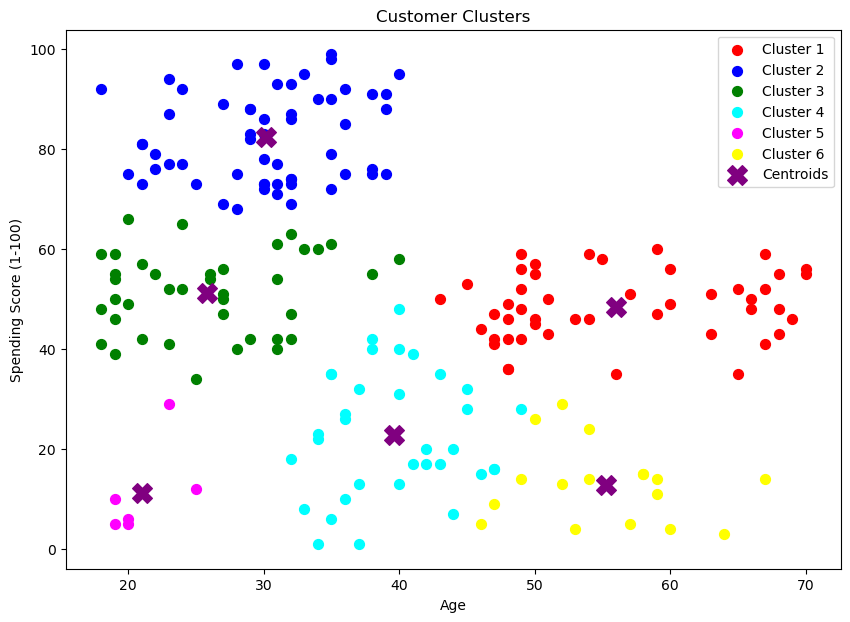

In [31]:
# Configura o tamanho da figura para que o gráfico tenha uma dimensão de 10x7 polegadas
plt.figure(figsize=(10, 7))

# Define uma lista de cores para representar visualmente cada cluster
colors = ['red', 'blue', 'green', 'cyan', 'magenta', 'yellow', 'black', 'orange']

# Loop para plotar cada cluster com uma cor diferente
for i in range(6):  # Número de clusters (6 neste exemplo)
    # Cria um gráfico de dispersão para os pontos que pertencem ao cluster 'i'
    # 'X_Age_Score[y_kmeans == i, 0]' é a coordenada x dos pontos no cluster 'i'
    # 'X_Age_Score[y_kmeans == i, 1]' é a coordenada y dos pontos no cluster 'i'
    # 's=50' define o tamanho dos pontos no gráfico
    # 'color=colors[i]' usa uma cor diferente para cada cluster
    # 'label=f"Cluster {i+1}"' define o rótulo para cada cluster no gráfico
    plt.scatter(X_Age_Score[y_kmeans == i, 0], X_Age_Score[y_kmeans == i, 1], 
                s=50, color=colors[i], label=f'Cluster {i+1}')

# Adiciona os centróides ao gráfico com um marcador especial
# 'centroids[:, 0]' e 'centroids[:, 1]' são as coordenadas x e y dos centróides
# 's=200' define o tamanho dos marcadores dos centróides para destacá-los
# 'color="purple"' define a cor dos centróides
# 'label="Centroids"' adiciona uma legenda para os centróides
# 'marker="X"' usa um marcador 'X' para diferenciar os centróides dos pontos de dados
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, color='purple', label='Centroids', marker='X')

# Adiciona título e rótulos
plt.title('Customer Clusters')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()